<a href="https://colab.research.google.com/github/willakuffo/ML_finalproject/blob/main/customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data
##Context
Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

##Content
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

----------------------------------------------------------------
### `Data ` [Source](https://www.kaggle.com/abisheksudarshan/customer-segmentation)

`Sources of error in data` - missing data / null values/ NaNs

Download dataset from git repo and unzip


In [242]:
import os
if not os.path.exists('customer.zip'):
  !wget https://github.com/willakuffo/ML_finalproject/raw/main/customer.zip
  !unzip customer.zip
else:
  print('data alredy in dir')

data alredy in dir


Load dataset

In [243]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Data head and tail

In [244]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [245]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


##Exploratory Data Analysis

combine training and testing set to do Exploratory Data Analysis

In [246]:
#concatenate train and test data for EDA
df_tt = pd.concat([train,test],axis = 0)
df_tt

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


check for null values / missing values

In [247]:
#null values present in output
df_tt['Segmentation'].isnull().value_counts()

False    8068
True     2627
Name: Segmentation, dtype: int64

null values present in columns

In [248]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


drop any row with null values

In [249]:

df_tt.dropna(axis = 0,how = 'any',inplace = True)


Resulting dataframe after droping null values

In [250]:
df_tt

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Reset index and drop index column

In [251]:
df_tt.reset_index(inplace = True)


In [252]:
df_tt.drop(columns = ['index'],inplace = True)
df_tt

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
6660,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
6661,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
6662,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
6663,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


summary statistics

In [253]:
df_tt.describe()

,ID,Age,Work_Experience,Family_Size
count,6665.00000,6665.000000,6665.000000,6665.000000
mean,463519.84096,43.536084,2.629107,2.841110
std,2566.43174,16.524054,3.405365,1.524743
min,458982.00000,18.000000,0.000000,1.000000
25%,461349.00000,31.000000,0.000000,2.000000
50%,463575.00000,41.000000,1.000000,2.000000
75%,465741.00000,53.000000,4.000000,4.000000
max,467974.00000,89.000000,14.000000,9.000000


In [254]:
df_tt['Gender'].dtype

dtype('O')

##Distibution of columns / features


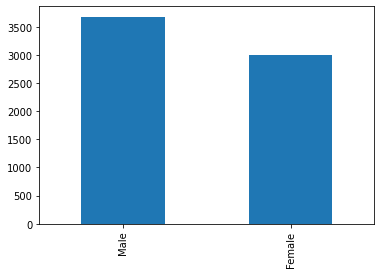

In [255]:
df_tt['Gender'].value_counts().plot(kind = 'bar')

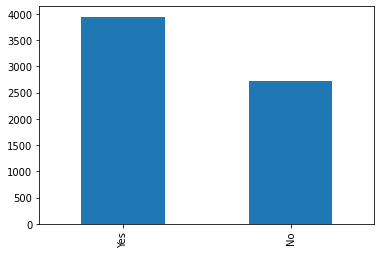

In [256]:
df_tt['Ever_Married'].value_counts().plot(kind = 'bar')

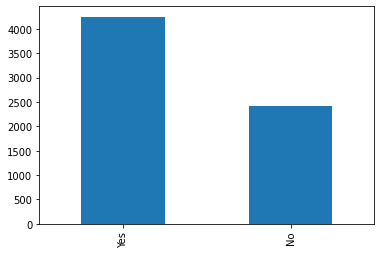

In [257]:
df_tt['Graduated'].value_counts().plot(kind = 'bar')

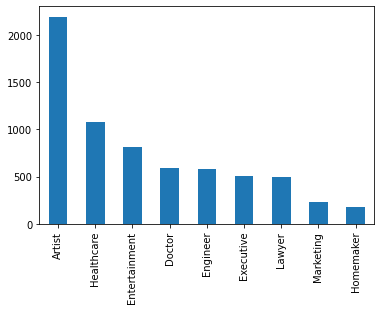

In [258]:
df_tt['Profession'].value_counts().plot(kind = 'bar')

The distribution of the customer segmentation is faily balanced among the classes, therfore the examples in the dataset for each customer segmentation is not too biased or skewed. The model will also have enough(balanced) examples from each class to learn

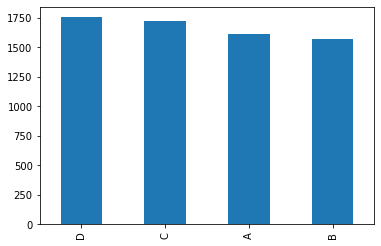

In [259]:
df_tt['Segmentation'].value_counts().plot(kind = 'bar')

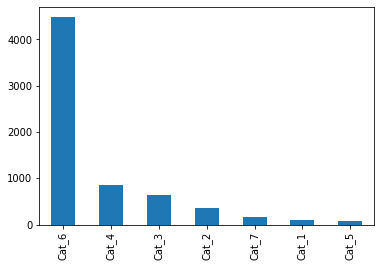

In [260]:
df_tt['Var_1'].value_counts().plot(kind = 'bar')

The age distribution shows that the majority oof the customers are young

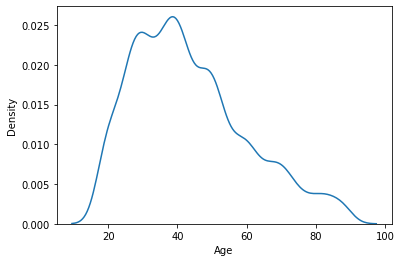

In [261]:
import seaborn as sns
sns.kdeplot(df_tt['Age'],label = 'age')

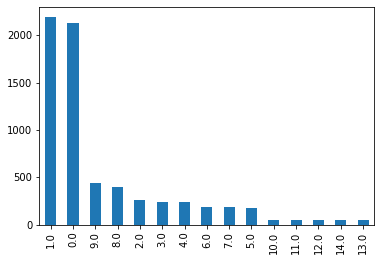

In [262]:
df_tt['Work_Experience'].value_counts().plot(kind = 'bar')

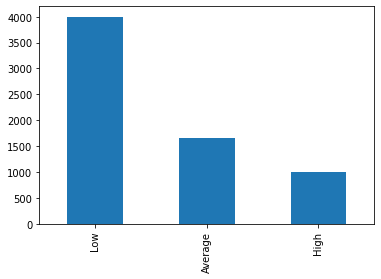

In [263]:
df_tt['Spending_Score'].value_counts().plot(kind = 'bar')

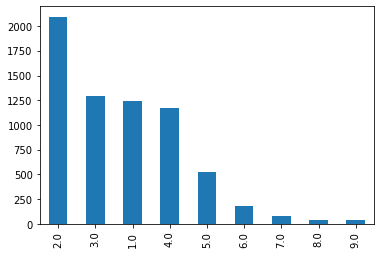

In [264]:
df_tt['Family_Size'].value_counts().plot(kind = 'bar')

##Input-output Feature relationship / distribution. 

See the distribution of the columns/ features in the various customer segments `A,B,C,D`

========================================================================

Distribution of age in the customer segments



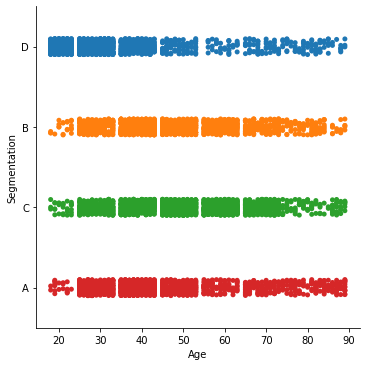

In [265]:

sns.catplot(y = 'Segmentation',x = 'Age',data = df_tt)


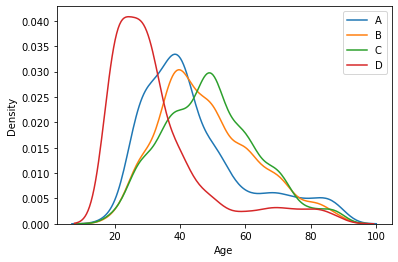

In [266]:
import matplotlib.pyplot as plt
sns.kdeplot(df_tt['Age'][df_tt['Segmentation']=='A'],label = 'A')
sns.kdeplot(df_tt['Age'][df_tt['Segmentation']=='B'],label = 'B')
sns.kdeplot(df_tt['Age'][df_tt['Segmentation']=='C'],label = 'C')
sns.kdeplot(df_tt['Age'][df_tt['Segmentation']=='D'],label = 'D')
plt.legend()

Function to check the distribution of `columnn/feature`
 in the various customer segments





In [267]:
def explore_feature_segmentation(feature = None):
         print(feature,'distribution per customer segmentation')
         exp =  pd.concat([pd.DataFrame(df_tt[feature][df_tt['Segmentation'] == 'A'].value_counts()),
         pd.DataFrame(df_tt[feature][df_tt['Segmentation'] == 'B'].value_counts()),
         pd.DataFrame(df_tt[feature][df_tt['Segmentation'] == 'C'].value_counts()),
         pd.DataFrame(df_tt[feature][df_tt['Segmentation'] == 'D'].value_counts())],axis = 1
          )
         exp.columns = df_tt['Segmentation'].unique()
         return exp



In [268]:
gender_seg = explore_feature_segmentation(feature = 'Gender')
gender_seg

Gender distribution per customer segmentation


,D,B,C,A
Male,876,840,925,1036
Female,740,732,795,721


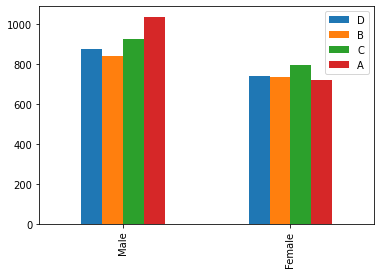

In [269]:
gender_seg.plot(kind = 'bar')

In [270]:
married_seg = explore_feature_segmentation(feature = 'Ever_Married')
married_seg

Ever_Married distribution per customer segmentation


,D,B,C,A
Yes,940,1153,1382,469
No,676,419,338,1288


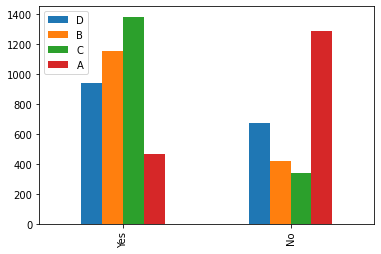

In [271]:
married_seg.plot(kind = 'bar')

In [272]:
prof_seg = explore_feature_segmentation(feature = 'Profession')
prof_seg


Profession distribution per customer segmentation


,D,B,C,A
Artist,470,660,948,114
Entertainment,320,191,125,173
Engineer,221,159,64,138
Doctor,168,127,123,174
Lawyer,157,133,124,86
Executive,98,149,164,94
Healthcare,88,85,124,780
Homemaker,48,44,19,64
Marketing,46,24,29,134


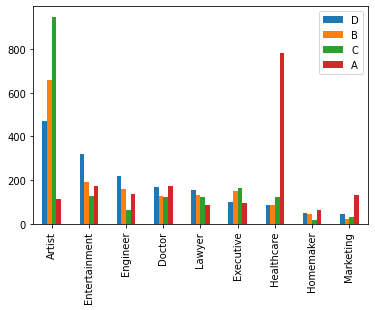

In [273]:
prof_seg.plot(kind = 'bar')

In [274]:
grad_seg = explore_feature_segmentation(feature = 'Graduated')
grad_seg

Graduated distribution per customer segmentation


,D,B,C,A
Yes,1025,1151,1434,639
No,591,421,286,1118


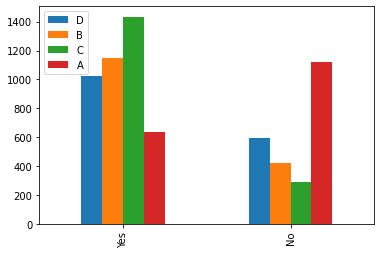

In [275]:
grad_seg.plot(kind = 'bar')

In [276]:
work_seg = explore_feature_segmentation(feature = 'Work_Experience')
work_seg

Work_Experience distribution per customer segmentation


,D,B,C,A
0.0,491,527,587,528
1.0,527,536,600,524
2.0,54,58,73,74
3.0,56,56,58,65
4.0,48,63,64,58
5.0,47,39,39,54
6.0,41,43,44,59
7.0,49,38,51,47
8.0,100,76,88,133
9.0,132,89,84,138


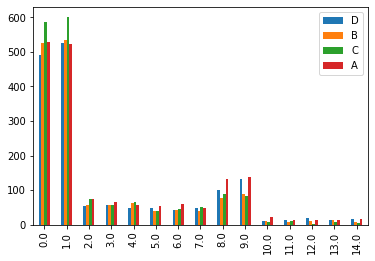

In [277]:
work_seg.plot(kind = 'bar')

In [278]:
spending_seg = explore_feature_segmentation(feature = 'Spending_Score')
spending_seg

Spending_Score distribution per customer segmentation


,D,B,C,A
Low,1132,758,555,1554
Average,270,499,795,98
High,214,315,370,105


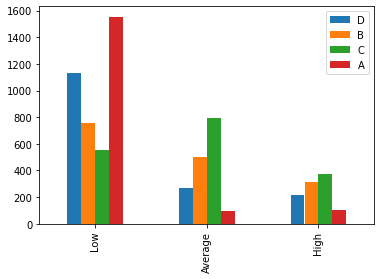

In [279]:
spending_seg.plot(kind = 'bar')

In [280]:
family_seg = explore_feature_segmentation(feature = 'Family_Size')
family_seg

Family_Size distribution per customer segmentation


,D,B,C,A
1.0,484,323,119,317
2.0,537,538,711,307
3.0,277,281,348,386
4.0,182,260,339,393
5.0,66,117,132,207
6.0,32,32,37,79
7.0,22,13,12,34
8.0,7,5,11,19
9.0,9,3,11,15


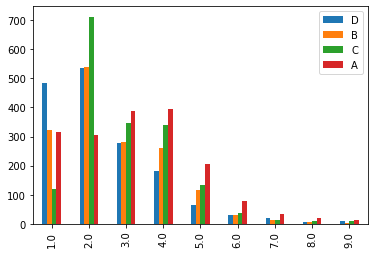

In [281]:
family_seg.plot(kind = 'bar')

In [282]:
df_tt.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

##Feature Engineering/Data preprocessing

Here, we recode all the non-numeric categorical variables (features/columns) numeric categorical features

In [283]:
gender_recoded = {'Male':1,'Female' :0}
ever_married_recoded = {'Yes':1,'No':0}
Graduated_recoded = {'Yes':1,'No':0}
Profession_recoded = dict(zip(df_tt['Profession'].unique(),list(range(0,len(df_tt['Profession'].unique())))))
Spending_score_recoded = {'Low':0,'Average':1,'High':2}
Segmentation_recoded = {'A':0,'B':1,'C':2,'D':3}



In [284]:
Profession_recoded

{'Artist': 3,
 'Doctor': 4,
 'Engineer': 1,
 'Entertainment': 6,
 'Executive': 8,
 'Healthcare': 0,
 'Homemaker': 5,
 'Lawyer': 2,
 'Marketing': 7}

Create new columns and insert the recoded variables

In [285]:
df_tt['Gender_recoded'] = df_tt['Gender'].replace(gender_recoded)
df_tt['Ever_Married_recoded'] = df_tt['Ever_Married'].replace(ever_married_recoded)
df_tt['Graduated_recoded'] =  df_tt['Graduated'].replace(Graduated_recoded)
df_tt['Profession_recoded'] = df_tt['Profession'].replace(Profession_recoded)
df_tt['Spending_Score_recoded'] = df_tt['Spending_Score'].replace(Spending_score_recoded)
df_tt['Segmentation_recoded'] = df_tt['Segmentation'].replace(Segmentation_recoded)

resulting dataframe containing recoded variables




In [286]:
df_tt.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_recoded,Ever_Married_recoded,Graduated_recoded,Profession_recoded,Spending_Score_recoded,Segmentation_recoded
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1,0,0,0,0,3
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0,1,1,1,0,1
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1,1,1,2,2,1
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,1,1,0,3,1,2
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C,1,0,1,0,0,2


#Supervised Learning - Classification

Separate the input and output features for modelling

In [287]:
X = df_tt[['Gender_recoded','Ever_Married_recoded','Age','Profession_recoded','Work_Experience','Spending_Score_recoded','Family_Size','Graduated_recoded']]
Y = df_tt['Segmentation_recoded']

Split dataset into  70% training and 30% testing data

In [288]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.3,random_state = 1)

data shapes

In [289]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((4665, 8), (4665,), (2000, 8), (2000,))

import numpy and reshape appropriately for training

In [290]:
import numpy as np
ytrain = np.reshape(ytrain.values,(-1,1))
ytest = np.reshape(ytest.values,(-1,1))

new shapes



In [291]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((4665, 8), (4665, 1), (2000, 8), (2000, 1))

In [292]:
xtrain[['Gender_recoded','Profession_recoded']]

,Gender_recoded,Profession_recoded
2619,1,3
5426,1,8
6455,0,0
4883,1,2
6361,1,3
...,...,...
905,0,1
5192,0,4
3980,0,2
235,0,0


##Inestigate Feature Importance

Since most of the variables in the dataset apart from age are categorical (including the output - sustomer segmentation), we want to investigate the importance of each feature to predicting the output by;



* Train a Decision tree classifier on all the features in the dataset and rank them according to level of importance in predicting output customer segments
* Use cramer's v for categorical to categorical correlation

Applying insights from our exploratory data analysis and the results from investigating the feature importance, this will be a guide for feature selection

In [293]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 1) 
tree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [294]:
feature_importance = tree.tree_.compute_feature_importances(normalize = True)
feature_importance

array([0.0446917 , 0.0293916 , 0.41426737, 0.09812527, 0.18593746,
       0.06416283, 0.11988613, 0.04353765])

Map and rank features

In [295]:
f_I = dict(zip(xtrain.columns,list(feature_importance)))
f_I

{'Age': 0.4142673664911467,
 'Ever_Married_recoded': 0.029391597433543845,
 'Family_Size': 0.11988613085731238,
 'Gender_recoded': 0.04469169539147589,
 'Graduated_recoded': 0.04353765001563995,
 'Profession_recoded': 0.09812526531912673,
 'Spending_Score_recoded': 0.06416282976324007,
 'Work_Experience': 0.18593746472851438}

Ranking of features in order of importance as return by the decision tree classeifier

In [296]:
pd.DataFrame(f_I,index = ['importance']).T.sort_values('importance',ascending = False).style.background_gradient(cmap = 'Greens')

,importance
Age,0.414267
Work_Experience,0.185937
Family_Size,0.119886
Profession_recoded,0.098125
Spending_Score_recoded,0.064163
Gender_recoded,0.044692
Graduated_recoded,0.043538
Ever_Married_recoded,0.029392


Using Cramers V

In [297]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [298]:
vs = []
for feature in xtrain.columns:
  v = cramers_v(pd.concat([xtrain,xtest])[feature].values,np.reshape(np.concatenate([ytrain,ytest]),(df_tt.shape[0],)))
  vs.append(v)

pd.DataFrame(dict(zip(xtrain.columns,vs)),index = ['cramers_v']).T.sort_values('cramers_v',ascending = False).style.background_gradient(cmap = 'Greens')


,cramers_v
Ever_Married_recoded,0.426973
Graduated_recoded,0.370478
Age,0.346169
Profession_recoded,0.337046
Spending_Score_recoded,0.316844
Family_Size,0.171089
Work_Experience,0.052636
Gender_recoded,0.040793


=====
### KNN
=====

In [299]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action = 'ignore')
#knn = KNeighborsClassifier(n_neighbors = 3)

Select age column from training and testing data  - Use as baseline model



In [300]:
xtrain_age = np.reshape(xtrain['Age'].values,(-1,1))
xtest_age = np.reshape(xtest['Age'].values,(-1,1))

Hyperparameter Tuning of KNN -Function to Train a KNN by tuning the number of neighbors

In [301]:
def train_KNN(Xtrain,Ytrain,Xtest,Ytest,norm = False,scaler = None):
  error_rates = []
  knns = {}
  print('Tuning neighbors from 1 to 200')
  for i in range(1, 201):# try on different neighbors
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(Xtrain,Ytrain)
      if not norm:ypred_age = knn.predict(Xtest)
      else:ypred_age = knn.predict(scaler.fit_transform(Xtest))
      accuracy = accuracy_score(Ytest, ypred_age)
      error_rates.append((1-accuracy))
      knns[i] = knn
  return knns,error_rates

In [302]:
knns,error_rates = train_KNN(xtrain_age,ytrain,xtest_age,ytest)

Tuning neighbors from 1 to 200


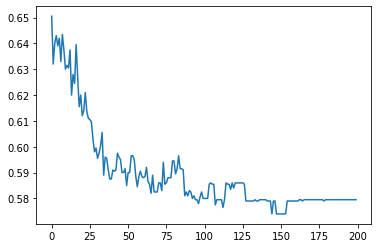

In [303]:
import matplotlib.pyplot as plt
plt.plot(error_rates)


Function that returns KNN with best neighbor based o error rate

In [304]:
def KNN_with_best_N(knns,error_rates):
    best_N = error_rates.index(min(error_rates))
    print('best neighbor is:',best_N+1,' with error rate:',min(error_rates))
    return knns[best_N+1]


In [305]:
knn = KNN_with_best_N(knns,error_rates)

best neighbor is: 145  with error rate: 0.5740000000000001


In [306]:
ypred_age = knn.predict(xtest_age)

In [307]:
accuracy_score(ytest, ypred_age)

0.426

In [308]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(ytest,ypred_age))

              precision    recall  f1-score   support

           0       0.35      0.38      0.36       496
           1       0.32      0.04      0.07       501
           2       0.40      0.57      0.47       521
           3       0.54      0.72      0.62       482

    accuracy                           0.43      2000
   macro avg       0.40      0.43      0.38      2000
weighted avg       0.40      0.43      0.38      2000



In [309]:
confusion_matrix(ytest,ypred_age)

array([[188,  21, 139, 148],
       [150,  21, 253,  77],
       [133,  17, 295,  76],
       [ 73,   6,  55, 348]])

Decision boundaries

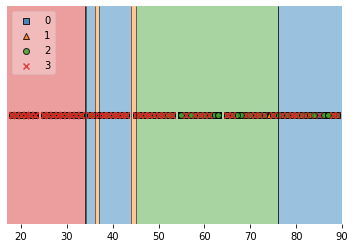

In [310]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(xtest_age, np.reshape(ytest,(ytest.shape[0],)), clf=knn, legend=2)


In [311]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()
xtrain_age_sc = sc.fit_transform(xtrain_age)
knns,error_rates = train_KNN(xtrain_age_sc,ytrain,xtest_age,ytest,norm = True,scaler = sc)
knn = KNN_with_best_N(knns,error_rates)
ypred_age = knn.predict(sc.fit_transform(xtest_age))
print('accuracy',accuracy_score(ytest, ypred_age))
print(classification_report(ytest,ypred_age))
confusion_matrix(ytest,ypred_age)

Tuning neighbors from 1 to 200
best neighbor is: 145  with error rate: 0.5720000000000001
accuracy 0.428
              precision    recall  f1-score   support

           0       0.35      0.35      0.35       496
           1       0.33      0.08      0.13       501
           2       0.40      0.57      0.47       521
           3       0.54      0.72      0.62       482

    accuracy                           0.43      2000
   macro avg       0.41      0.43      0.39      2000
weighted avg       0.40      0.43      0.39      2000



array([[174,  35, 139, 148],
       [132,  39, 253,  77],
       [118,  32, 295,  76],
       [ 68,  11,  55, 348]])

The effect of normalization on Age - KNN

The KNN is scale sensitive. Normalizing the input age improves the validation accuracy by 0.2%

In [312]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()
xtrain_age_sc = sc.fit_transform(xtrain_age)
knns,error_rates = train_KNN(xtrain_age_sc,ytrain,xtest_age,ytest,norm = True,scaler = sc)
knn = KNN_with_best_N(knns,error_rates)
ypred_age = knn.predict(sc.fit_transform(xtest_age))
print('accuracy',accuracy_score(ytest, ypred_age))
print(classification_report(ytest,ypred_age))
confusion_matrix(ytest,ypred_age)

Tuning neighbors from 1 to 200
best neighbor is: 145  with error rate: 0.5720000000000001
accuracy 0.428
              precision    recall  f1-score   support

           0       0.35      0.35      0.35       496
           1       0.33      0.08      0.13       501
           2       0.40      0.57      0.47       521
           3       0.54      0.72      0.62       482

    accuracy                           0.43      2000
   macro avg       0.41      0.43      0.39      2000
weighted avg       0.40      0.43      0.39      2000



array([[174,  35, 139, 148],
       [132,  39, 253,  77],
       [118,  32, 295,  76],
       [ 68,  11,  55, 348]])

Adding more input features - KNN

In [313]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()
#xtrain_age_sc = sc.fit_transform(xtrain_age)
input = ['Ever_Married_recoded','Graduated_recoded','Age','Profession_recoded','Family_Size','Spending_Score_recoded']#['Age','Work_Experience','Family_Size','Profession_recoded' ]
knns,error_rates = train_KNN(sc.fit_transform(xtrain[input]),ytrain,xtest[input],ytest,norm = True,scaler = sc)
knn = KNN_with_best_N(knns,error_rates)
ypred = knn.predict(sc.fit_transform(xtest[input]))
print('accuracy',accuracy_score(ytest, ypred))
print(classification_report(ytest,ypred))
confusion_matrix(ytest,ypred)

Tuning neighbors from 1 to 200
best neighbor is: 28  with error rate: 0.487
accuracy 0.513
              precision    recall  f1-score   support

           0       0.45      0.46      0.45       496
           1       0.44      0.33      0.37       501
           2       0.54      0.58      0.56       521
           3       0.59      0.69      0.64       482

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



array([[228,  94,  75,  99],
       [101, 164, 170,  66],
       [ 69,  87, 303,  62],
       [109,  29,  13, 331]])

======
##SVM
======

In [314]:
from sklearn.svm import SVC

SVM baseline model with Age as input

In [315]:
svm = SVC(kernel = 'rbf')
svm.fit(xtrain_age,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [316]:
ypred_svm = svm.predict(xtest_age)

In [317]:
accuracy_score(ytest,ypred_svm)

0.4205

In [318]:
print(classification_report(ytest,ypred_svm))

              precision    recall  f1-score   support

           0       0.33      0.37      0.35       496
           1       0.24      0.02      0.04       501
           2       0.40      0.57      0.47       521
           3       0.54      0.72      0.62       482

    accuracy                           0.42      2000
   macro avg       0.38      0.42      0.37      2000
weighted avg       0.38      0.42      0.37      2000



In [319]:
confusion_matrix(ytest,ypred_svm)

array([[185,  22, 141, 148],
       [156,  12, 256,  77],
       [137,  12, 296,  76],
       [ 75,   4,  55, 348]])

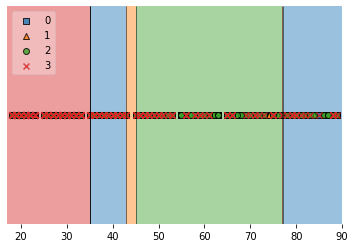

In [320]:

plot_decision_regions(xtest_age, np.reshape(ytest,(ytest.shape[0],)), clf=svm, legend=2)


Effect of normalization - SVM
SVM is not scale sensitive as KNN. Normaliation on age does not affect performance

In [321]:
svm = SVC(kernel = 'rbf')
svm.fit(xtrain_age_sc,ytrain)
ypred_svm = svm.predict(sc.fit_transform(xtest_age))
print(accuracy_score(ytest,ypred_svm))
print(classification_report(ytest,ypred_svm))
confusion_matrix(ytest,ypred_svm)

0.4205
              precision    recall  f1-score   support

           0       0.33      0.37      0.35       496
           1       0.24      0.02      0.04       501
           2       0.40      0.57      0.47       521
           3       0.54      0.72      0.62       482

    accuracy                           0.42      2000
   macro avg       0.38      0.42      0.37      2000
weighted avg       0.38      0.42      0.37      2000



array([[185,  22, 141, 148],
       [156,  12, 256,  77],
       [137,  12, 296,  76],
       [ 75,   4,  55, 348]])

HyperParameter tuning kernel (optimization function) - SVM 

Using selecteed input 

input = ['Ever_Married_recoded','Graduated_recoded','Age','Profession_recoded','Family_Size','Spending_Score_recoded']

In [322]:
svm = SVC(kernel = 'rbf')
svm.fit(xtrain[input],ytrain)
ypred_svm = svm.predict(xtest[input])
print(accuracy_score(ytest,ypred_svm))
print(classification_report(ytest,ypred_svm))
confusion_matrix(ytest,ypred_svm)

0.434
              precision    recall  f1-score   support

           0       0.37      0.43      0.39       496
           1       0.31      0.02      0.03       501
           2       0.40      0.61      0.49       521
           3       0.54      0.68      0.61       482

    accuracy                           0.43      2000
   macro avg       0.41      0.43      0.38      2000
weighted avg       0.40      0.43      0.38      2000



array([[211,   9, 146, 130],
       [143,   8, 277,  73],
       [122,   7, 319,  73],
       [100,   2,  50, 330]])

In [323]:
svm = SVC(kernel = 'poly')
svm.fit(xtrain[input],ytrain)
ypred_svm = svm.predict(xtest[input])
print(accuracy_score(ytest,ypred_svm))
print(classification_report(ytest,ypred_svm))
confusion_matrix(ytest,ypred_svm)

0.403
              precision    recall  f1-score   support

           0       0.33      0.24      0.28       496
           1       0.34      0.02      0.04       501
           2       0.47      0.54      0.50       521
           3       0.39      0.82      0.53       482

    accuracy                           0.40      2000
   macro avg       0.38      0.41      0.34      2000
weighted avg       0.38      0.40      0.34      2000



array([[120,  11,  84, 281],
       [108,  12, 209, 172],
       [ 75,   8, 280, 158],
       [ 56,   4,  28, 394]])

In [324]:
svm = SVC(kernel = 'linear')
svm.fit(xtrain[input],ytrain)
ypred_svm = svm.predict(xtest[input])
print(accuracy_score(ytest,ypred_svm))
print(classification_report(ytest,ypred_svm))
confusion_matrix(ytest,ypred_svm)

0.462
              precision    recall  f1-score   support

           0       0.42      0.48      0.45       496
           1       0.32      0.04      0.06       501
           2       0.42      0.69      0.52       521
           3       0.58      0.64      0.61       482

    accuracy                           0.46      2000
   macro avg       0.44      0.46      0.41      2000
weighted avg       0.44      0.46      0.41      2000



array([[239,  16, 151,  90],
       [134,  18, 286,  63],
       [ 82,  11, 358,  70],
       [110,  11,  52, 309]])

In [325]:
svm = SVC(kernel = 'sigmoid')
svm.fit(xtrain[input],ytrain)
ypred_svm = svm.predict(xtest[input])
print(accuracy_score(ytest,ypred_svm))
print(classification_report(ytest,ypred_svm))
confusion_matrix(ytest,ypred_svm)

0.301
              precision    recall  f1-score   support

           0       0.20      0.33      0.25       496
           1       0.21      0.01      0.03       501
           2       0.24      0.18      0.21       521
           3       0.44      0.70      0.54       482

    accuracy                           0.30      2000
   macro avg       0.27      0.31      0.26      2000
weighted avg       0.27      0.30      0.25      2000



array([[165,   9, 128, 194],
       [257,   7, 109, 128],
       [305,  13,  93, 110],
       [ 88,   5,  52, 337]])

Select best SVM kernel (which happens to be linear) and hyperparameter tune regularization arg - C. The strength of the reguarization is inversely related to C 

In [326]:
ers = []#error rates for different Cs
Cs = np.linspace(1,5,num = 10)
SVMs = []
for C in Cs:
  svm = SVC(kernel = 'linear',C = C)
  svm.fit(xtrain[input],ytrain)
  ypred_svm = svm.predict(xtest[input])
  er = 1-accuracy_score(ytest,ypred_svm)
  ers.append(er)
  SVMs.append(svm)
  #print(classification_report(ytest,ypred_svm))
  #confusion_matrix(ytest,ypred_svm)

Error rate regarding regularization


Text(0, 0.5, 'error rate')

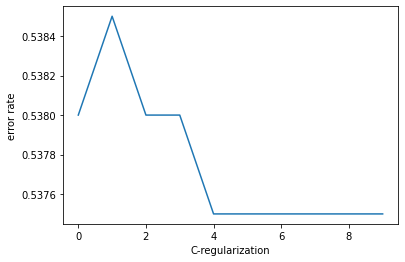

In [327]:
plt.plot(ers)
plt.xlabel('C-regularization')
plt.ylabel('error rate')

Best SVM per regularization

The best error rate during the regularization was 0.5375 with C >= 4

In [328]:
#best error rate, C
min(ers),ers.index(min(ers))

(0.5375, 4)

In [329]:
best_svm = SVMs[ers.index(min(ers))]
ypred_svm = best_svm.predict(xtest[input])
print('accuracy:',accuracy_score(ytest,ypred_svm))
print(classification_report(ytest,ypred_svm))
confusion_matrix(ytest,ypred_svm)


accuracy: 0.4625
              precision    recall  f1-score   support

           0       0.42      0.48      0.45       496
           1       0.32      0.04      0.06       501
           2       0.42      0.69      0.52       521
           3       0.58      0.64      0.61       482

    accuracy                           0.46      2000
   macro avg       0.44      0.46      0.41      2000
weighted avg       0.44      0.46      0.41      2000



array([[239,  16, 151,  90],
       [133,  18, 287,  63],
       [ 81,  11, 359,  70],
       [110,  11,  52, 309]])

===================
##Neural Network
===================

In [330]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [331]:
nn_ytrain = to_categorical(ytrain)
nn_ytest = to_categorical(ytest)

In [332]:
def NN(X = None,Y = None,optimizer = None,loss = None):
  model = Sequential()
  model.add(Dense(units = 16,input_dim =X.shape[1], activation = 'relu'))
  model.add(Dense(units = 32, activation = 'relu'))
  model.add(Dense(units = 64, activation = 'relu'))
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dense(units = 512, activation = 'relu'))
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dense(units = 164, activation = 'relu'))
  model.add(Dense(units = 32, activation = 'relu'))
  model.add(Dense(units = 16, activation = 'relu'))
  model.add(Dense(units = 8 ,activation = 'relu'))
  model.add(Dense(units = Y.shape[1], activation = 'softmax'))
  model.compile(optimizer = optimizer,loss = loss,metrics = ['accuracy'])
  print('Neural Netowrk info:\ninput dim: ',X.shape[1],'\noutput dim: ',Y.shape[1],'\noptimizer:',optimizer,'\nloss: ',loss)
  return model

In [333]:
nn = NN(X = xtrain[input],Y = nn_ytrain,optimizer = 'Adam',loss = 'mean_squared_error')

Neural Netowrk info:
input dim:  6 
output dim:  4 
optimizer: Adam 
loss:  mean_squared_error


In [334]:
hist = nn.fit(np.array(xtrain[input]),nn_ytrain,epochs = 100,validation_data= (np.array(xtest[input]),nn_ytest),callbacks = [ModelCheckpoint(monitor='val_loss',mode = 'min',save_best_only=True,filepath= 'nn.hdf5',verbose = 1)])

Epoch 1/100
146/146 [==============================] - 2s 6ms/step - loss: 0.1880 - accuracy: 0.2606 - val_loss: 0.1843 - val_accuracy: 0.3480

Epoch 00001: val_loss improved from inf to 0.18427, saving model to nn.hdf5
Epoch 2/100
146/146 [==============================] - 1s 5ms/step - loss: 0.1833 - accuracy: 0.3664 - val_loss: 0.1722 - val_accuracy: 0.3660

Epoch 00002: val_loss improved from 0.18427 to 0.17221, saving model to nn.hdf5
Epoch 3/100
146/146 [==============================] - 1s 5ms/step - loss: 0.1680 - accuracy: 0.4072 - val_loss: 0.1836 - val_accuracy: 0.3195

Epoch 00003: val_loss did not improve from 0.17221
Epoch 4/100
146/146 [==============================] - 1s 5ms/step - loss: 0.1692 - accuracy: 0.4120 - val_loss: 0.1616 - val_accuracy: 0.4355

Epoch 00004: val_loss improved from 0.17221 to 0.16158, saving model to nn.hdf5
Epoch 5/100
146/146 [==============================] - 1s 5ms/step - loss: 0.1618 - accuracy: 0.4530 - val_loss: 0.1602 - val_accuracy: 0

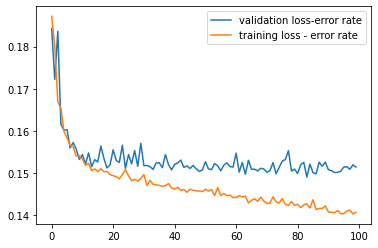

In [344]:
plt.plot(hist.history['val_loss'],label = 'validation loss-error rate')
plt.plot(hist.history['loss'],label = 'training loss - error rate')
#plt.plot(hist.history['accuracy'])
plt.legend()

In [336]:
nn_pred = nn.predict_classes(xtest[input])
accuracy_score(ytest,nn_pred)

0.504

In [337]:
nn_pred

array([2, 3, 2, ..., 0, 3, 2])

In [338]:
print(classification_report(ytest,nn_pred))

              precision    recall  f1-score   support

           0       0.45      0.36      0.40       496
           1       0.39      0.23      0.29       501
           2       0.50      0.67      0.58       521
           3       0.59      0.76      0.66       482

    accuracy                           0.50      2000
   macro avg       0.48      0.50      0.48      2000
weighted avg       0.48      0.50      0.48      2000



In [339]:
confusion_matrix(ytest,nn_pred)

array([[178, 104,  90, 124],
       [ 91, 115, 237,  58],
       [ 47,  53, 351,  70],
       [ 79,  21,  18, 364]])

Hyperparameter Tuning optimizer - Neural Network - SDG

In [345]:
nn = NN(X = xtrain[input],Y = nn_ytrain,optimizer = 'SGD',loss = 'mean_squared_error')

Neural Netowrk info:
input dim:  6 
output dim:  4 
optimizer: SGD 
loss:  mean_squared_error


In [346]:
hist = nn.fit(np.array(xtrain[input]),nn_ytrain,epochs = 100,validation_data= (np.array(xtest[input]),nn_ytest),callbacks = [ModelCheckpoint(monitor='val_loss',mode = 'min',save_best_only=True,filepath= 'nn.hdf5',verbose = 1)])

Epoch 1/100
146/146 [==============================] - 1s 5ms/step - loss: 0.1885 - accuracy: 0.2826 - val_loss: 0.1879 - val_accuracy: 0.2410

Epoch 00001: val_loss improved from inf to 0.18795, saving model to nn.hdf5
Epoch 2/100
146/146 [==============================] - 1s 4ms/step - loss: 0.1873 - accuracy: 0.2774 - val_loss: 0.1874 - val_accuracy: 0.2410

Epoch 00002: val_loss improved from 0.18795 to 0.18745, saving model to nn.hdf5
Epoch 3/100
146/146 [==============================] - 1s 4ms/step - loss: 0.1868 - accuracy: 0.2741 - val_loss: 0.1869 - val_accuracy: 0.3055

Epoch 00003: val_loss improved from 0.18745 to 0.18694, saving model to nn.hdf5
Epoch 4/100
146/146 [==============================] - 1s 4ms/step - loss: 0.1865 - accuracy: 0.3240 - val_loss: 0.1864 - val_accuracy: 0.3680

Epoch 00004: val_loss improved from 0.18694 to 0.18645, saving model to nn.hdf5
Epoch 5/100
146/146 [==============================] - 1s 4ms/step - loss: 0.1859 - accuracy: 0.3946 - val_l

In [347]:
nn_pred = nn.predict_classes(xtest[input])
accuracy_score(ytest,nn_pred)


0.474

##Unsupervised Learning

In [348]:
from sklearn.cluster import KMeans
train = pd.concat([xtrain,xtest])
train

,Gender_recoded,Ever_Married_recoded,Age,Profession_recoded,Work_Experience,Spending_Score_recoded,Family_Size,Graduated_recoded
2619,1,1,68,3,1.0,0,1.0,1
5426,1,1,58,8,4.0,2,3.0,0
6455,0,0,21,0,5.0,0,5.0,0
4883,1,1,76,2,1.0,0,2.0,1
6361,1,1,45,3,0.0,1,3.0,1
...,...,...,...,...,...,...,...,...
3301,0,0,30,1,0.0,0,1.0,0
2353,0,1,43,3,1.0,2,4.0,1
854,1,0,43,6,0.0,0,5.0,1
3544,1,0,22,0,0.0,0,4.0,0


In [460]:
features = ['Age','Work_Experience','Family_Size']
kmeans = KMeans(n_clusters=4,random_state = 3,max_iter = 1000).fit(train[['Age','Family_Size']].values)

In [461]:
ypred = kmeans.labels_

In [462]:
ytrue = np.concatenate([ytrain,ytest])#['Segmentation']

In [463]:
accuracy_score(ytrue,ypred)

0.22610652663165792

In [464]:
train['kmeans_labels'] = ypred

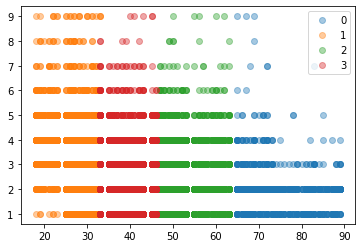

In [465]:
grouped = train.groupby('kmeans_labels')
for name, group in grouped:
        plt.plot(group['Age'], group['Family_Size'], 
                 'o', alpha=0.4, label=name)
        plt.legend()

In [466]:
train['Segmentation'] = np.concatenate([ytrain,ytest])

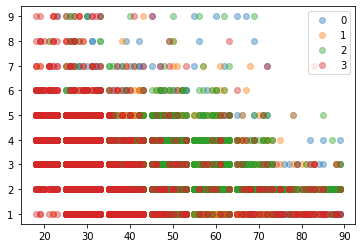

In [467]:
grouped = train.groupby('Segmentation')
for name, group in grouped:
        plt.plot(group['Age'], group['Family_Size'], 
                 'o', alpha=0.4, label=name)
        plt.legend()